# SC42150 - Statistical Signal Processing
## Python Assignment I: Stock Market Analysis

#### Team members

- Name (student number): Petar Velchev 4349253
- Name (student number):

---

## Introduction

The goal of this assignment is to help you get a more practical understanding of some of the concepts of Statistical Signal Processing. Specifically, you will work with stochastic processes and determine their moments, stationarity and ergodicity properties, and also try to detrend the data.

In order to achieve those objectives, you will use the Python programming language, and specifically the modules numpy, scipy (for numerical processing) and matplotlib (for plotting). In case you are completely unfamiliar with Python, you should learn the basics before attempting this exercise. You are allowed to use numpy's implementations of common routines, such as mean or cov amongst other, but if you do so make sure you have read the documentation and are sure that they accomplish exactly what is taught in the lecture notes, as sometimes there are small differences in definitions and implementations. 

Finally, you are also going to use the Jupyter Notebook file format, which might require installing some dependencies on your system. You can find instructions on installing Jupyter [here](https://jupyter.org/install).

## Reporting

The report of this python exercise consists of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells. Please use the already indicated cells and format. You will **also** need to deliver a `PDF` version of this file.

In order to create a PDF version of this file, go to the top left, click on `File` then `Export Notebook As` and Choose `PDF`.
If this feature is not supported by your system, you can also choose `LaTeX`.
Then, you can use your preferred `LaTeX` compiler to create the `PDF`. After generation you PDF report, please double check if all answers/plots are correctly displayed.

Moreover, you will also need to send the `.npy` file with the signals used in this exercise. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

## Stock market analysis

Lately you've been fascinated by the world of trading so you decided to learn more about it and see if you can learn any good strategies by examining the trading data and looking for patterns.

You are given a `.npy` file containing historical price data of various stocks. We will make the assumption that all the timeseries are just different realizations of the same stochastic process.

You will need to conduct the following steps to complete your investigation, each of which is worth 1 point:

**1. (2 points)** Import the `.npy` file provided using `np.load()` as indicated below. You should now have access to a $N\times K$ array, containing $K$ timeseries of historical price data of various stocks, each of length $N$. Plot the first one and also, in a new figure, plot the first 100 of them together.

(1000,) (1000,)


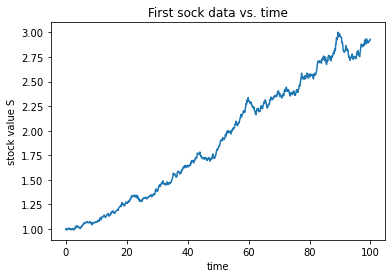

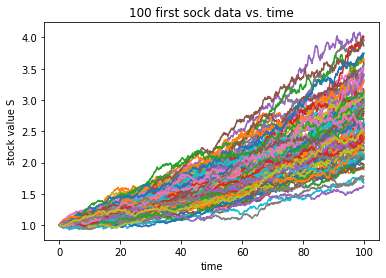

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

data = np.load('data2022.npz')
S =  data['S']
t =  data['t']

first = S[:,0]
first100 = S[:,:99]
print(np.shape(t), np.shape(first))
plt.plot(t, first)
plt.title("First sock data vs. time")
plt.xlabel("time")
plt.ylabel("stock value S")
plt.show()
plt.plot(t, first100)
plt.title("100 first sock data vs. time")
plt.xlabel("time")
plt.ylabel("stock value S")
plt.show()

We will denote the generating stochastic process with $S_{n}\sim f_{S_{n}}$, where $n=t\Delta t$ refers to the time index. Further, we will denote its $k$-th realization with $S_{n}^{k}$.

**2. (5 points)** Compute the ensemble mean and variance and plot each one.

Text(0, 0.5, 'variance of S')

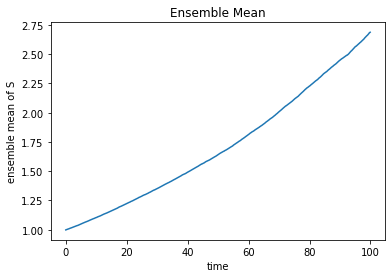

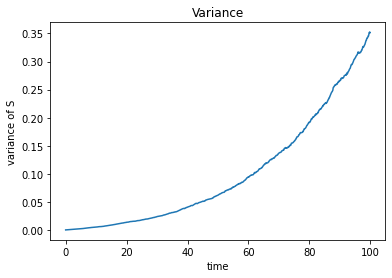

In [2]:
realization_samples = len(S[0,:])
samples_length = len(S[:,0])
realizations_sum=np.zeros(samples_length)
realizations_expec=np.zeros(samples_length)

for i in list(range(0, realization_samples-1)):
    realizations_sum = S[:,i] + realizations_sum
ensemble_mean = realizations_sum*(1/realization_samples)


for i in list(range(0, realization_samples-1)):
    realizations_expec = np.square(S[:,i] - ensemble_mean) + realizations_expec
ensemble_var = realizations_expec*(1/realization_samples)

plt.figure(1)
plt.plot(t, ensemble_mean)
plt.title("Ensemble Mean")
plt.xlabel("time")
plt.ylabel("ensemble mean of S")

plt.figure(2)
plt.plot(t, ensemble_var)
plt.title("Variance")
plt.xlabel("time")
plt.ylabel("variance of S")

**3. (10 points)** Compute the correlation matrix $R_{S}$ and visualize it using the `plt.matshow()` command. What can you deduce from that plot?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


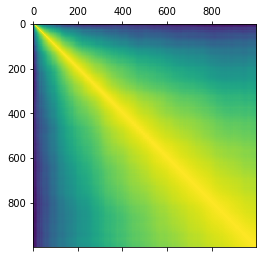

In [3]:
R_S = np.corrcoef(S[:])
plt.matshow(R_S)

correl_matrix = np.empty((samples_length, samples_length))





> Enter answer here.

**4. (10 points)** Can you determine whether the process $S_{n}$ is WSS or not? Explain why.

> Enter answer here.


A friend of yours who has been into trading for some time now, briefly looks at the data and tells you that the stock price changes can be explained by asset model like the following:
$$
    S_{n+1}=S_{n}e^{(\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{n}}\quad Z_{n}\sim\mathcal{N}(0,1)
    %\label{asset_model} \tag{1}
$$
However, you have no idea what this model represents and what values the parameters $\mu$ and $\sigma$ should take. By inspecting the data you can at least infer that $\Delta t=0.1$ time units, so that's a start.

In your efforts to make sense of ([1](#mjx-eqn-asset_model)), you notice that if you divide $S_{n+1}$ by $S_{n}$ and then take the logarithm you end up with

$$
    \log \left( \frac{S_{n+1}}{S_{n}} \right) = (\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{t}
    %\label{tf_asset_model} \tag{2}
$$

This looks promising so you decide to try this transformation on the data you have.

**5. (3 points)** Apply the transformation $X_{n+1}=\log\left(S_{n+1}/S_{n}\right)$ to your data. Is the resulting system BIBO stable?

In [38]:
S_N = S[0:-1,:]
S_N1 = S[1:,:]

X_n1 = np.log(S_N1 / S_N)


**6. (10 points)** Compute and plot the ensemble average and variance for $X_{n}$. Next, compute and plot the time average and variance for a single realization of $X_{n}$, e.g. for $k=1$. Based on the results, what can you say about the ergodicity and stationarity of $X_{n}$?

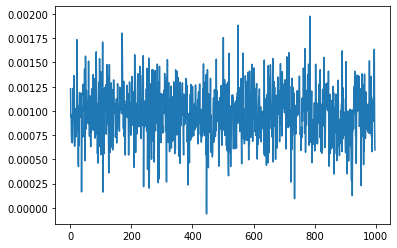

ValueError: operands could not be broadcast together with shapes (999,) (998,) 

In [39]:
X_n = X_n1 
n = len(X_n[0])

ensemble_avg = []
ensemble_var = []
t = np.arange(1, len(X_n)-1)

for i in t:
    ensemble_avg.append( 1/n * np.sum(X_n[i,:]))

plt.figure(1)
plt.plot(t, ensemble_avg)
plt.show()

dev = [(j - ensemble_mean)**2 for j in X_n.transpose()]


> Enter answer here.

**7. (10 points)** Compute the correlation matrix $R_{X}$ and visualize it using the `plt.matshow()` command.

   Can you determine whether the process $X_{n}$ is WSS? If so, what are its first moments, i.e. mean and variance? 

   Express $\mathbb{E}(X)$ and $\mathrm{Var}(X)$ analitically in terms of $\mu$, $\sigma$ and $\Delta t$.

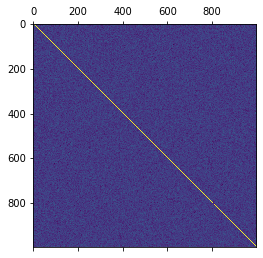

In [11]:
R_x = np.corrcoef(x_n[:])
plt.matshow(R_x)

> Enter answer here.

**8. (10 points)** Choose one of the transformed timeseries $X_{n}$, compute its auto-correlation function $r_{x}({k})$ and visualize it. Verify whether **Properties 5.8 - 5.10** apply to this process.

**Note:** if the signal $x(n)$ is auto-correlation ergodic,
the auto-correlation function $r_x(k)$ can be estimated as
(if we have only values $x_1, x_2, \dots, x_N$):

$$
    r_x(k) = \frac{1}{N-k} \sum_{i=k+1}^{N} x(i) x^*(i-k)
$$

You may also use Numpy's built in functions such as numpy.correlate(), though you should be careful to read the documentation beforehand.

**Note:** if you are unfamiliar with python, take care when copying `np.arrays`. Read more [here](https://numpy.org/doc/stable/reference/generated/numpy.copy.html).

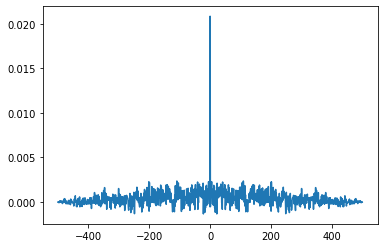

In [36]:
s1 = x_n[0,:]
x = np.linspace(-500,500,999)
r_x = np.correlate(s1,s1,mode="full")
plt.plot(x,r_x)



> Enter answer here.

**9. (10 points)** Calculate the Periodogram for the timeseries selected above. How does the Power Spectrum relate to the Autocorrelation function plotted above? 

Can you show that the total power of the signal is equal to the $r_x(0)$ value computed above? (**Note:** the value may not be precisely equal because you are using limited data sets and samples)

**Hint:** be careful with the indexing. You can use *numpy.fft.fft()* and *numpy.fft.fftfreq()* functions.

**Hint 2:** the resulting periodogram may not be represented in $\mathrm{rad/sample}$, but rather in $\mathrm{cycles/unit\ time}$. Be careful with the representation of your periodogram when calculating its integral / sum.

According to ([2](#mjx-eqn-tf_asset_model)), $X_{t}$ should be Gaussian White Noise since $Z_{t}$ is a Gaussian ZMWN. However, since you are only given data, it's good that you verify this. Remember that a stochastic process is Gaussian if the joint distribution of any combination of elements of $X_n$ is Gaussian. For now we will just take two random time instances to verify this, but feel free to try other combinations as well.

**10. (5 points)** Take two time instances of $X_{n}$, e.g. for $n=\{30,70\}$, and plot their 2d histogram across $K$ realizations $\{X_{n}^{k}\}_{k=1}^{K}$ by using $\sqrt{K}$ bins. Can you adequately fit a multivariate normal distribution on this histogram?

**Hint:** You may want to look into multivariate_normal.pdf() to help plot the levels of fitting distribution in 2D. To plot the experimental values, you may use plt.hist2d().

**11. (5 points)** Now verify that the marginals of the above distribution are also Gaussians, that is take the (1d) histograms of the above time instances (with $\sqrt{K}$ bins), plot them, and also fit the correspoding PDFs on top.

**Hint:** You may want to look into multivariate_normal.pdf() to help plot the levels of fitting distribution in 2D. To plot the experimental values, you may use plt.hist2d().


From ([1](#mjx-eqn-asset_model)), it follows that the first two statistical moments can be computed analytically:
\begin{align}
    \mathbb{E}\left[S_{n}\right] &= S_{0}e^{\mu n\Delta t} \label{asset_mean} \tag{3}\\
    \text{Var}\left[S_{n}\right] &= S_{0}^{2}e^{2\mu n\Delta t}\left(e^{\sigma^{2}n\Delta t}-1\right) \label{asset_var} \tag{4}
\end{align}
Having computed the ensemble mean and variance of $X_{n}$ you should be able to determine estimates for the values of $\mu$ and $\sigma$.

**12. (10 points)** Using the results from Question 7, compute estimates for $\mu$ and $\sigma$. Use those estimates to calculate the moments ([3](#mjx-eqn-asset_mean))-([4](#mjx-eqn-asset_var)) and plot those along with the ensemble moments of $S_{n}$ of Question 2.

**13. (10 points)** Having done all the above, you should now be in a position where you can discuss whether the model your friend suggested was good enough to describe the data.

> Enter answer here.